In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel
importlib.reload(scripts_intermodel)

<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = r'H2O'

In [ ]:
#### Load CRD results

In [3]:
# Get lbl line-by-line results
pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
                           'radiation/crd/LW/examples',
                           'lbl_H2008_h2O_cut25/OUTPUT_RADSUM')

pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
                                                cooling_rate=True, 
                                                signed_fluxes=True)

In [13]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = os.path.join('/nuwa_cluster/home/jackyu',
                            'radiation/crd/LW/examples',
                            'lbl_H1996_H2O_cut10/OUTPUT_RADSUM')

pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd1, 
                                                 cooling_rate=True, 
                                                 signed_fluxes=True)

In [ ]:
#### Load CLIRAD results

In [4]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/LW/examples',
                              'mls75_H2O_H2012/OUTPUT_CLIRAD.dat')

pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad, 
                                                        cooling_rate=True, 
                                                        signed_fluxes=True)

In [5]:
pathout_clirad_96 = os.path.join('/nuwa_cluster/home/jackyu',
                                 'radiation/clirad/LW/examples',
                                 'mls75_H2O/OUTPUT_CLIRAD.dat')

pnl_clirad_96 = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad_96, 
                                                           cooling_rate=True, 
                                                           signed_fluxes=True)

In [15]:
# prepare results Hitran 2012 updated version
def path_cliradlw_h2012():
    return '../clirad/LW/examples/mls75_H2O_H2012/CLIRAD_IR_output.dat'


def get_rateT(df, ratename = 'cooling rates'):
    return pd.DataFrame({'pressure': .5 * (df['p'].values[1:] + df['p'].values[: -1]),
                    ratename: df[ratename].values[1:]})


df = cliradwrangle.output_txtfile_to_DataFrame(path_cliradlw_h2012())

rateT_clirad2012 = get_rateT(df, ratename = 'cooling rates')

In [ ]:
#### Load LBLRTM results

In [141]:
# Get AER line-by-line results
pathout_lblrtm = os.path.join('/nuwa_cluster/home/jackyu',
                              'line_by_line/aerlbl_v12.2_package',
                              'runs/LW/run_mls75pro_H2O/OUTPUT_RADSUM')

pnl_lblrtm = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_lblrtm, 
                                                   signed_fluxes=True, 
                                                   cooling_rate=True)

In [ ]:
#### Load RRTMG results

In [6]:
# load results for no continuum

fpath = os.path.join('/nuwa_cluster/home/jackyu',
                     'radiation/rrtmg/LW/examples',
                     'mls70_H2O/OUTPUT_RRTM')

pnl_rrtmg = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=fpath, 
                            signed_fluxes = True, cooling_rate = True)

In [7]:
# load results for when there is continuum

fpath = os.path.join('/nuwa_cluster/home/jackyu',
                     'radiation/rrtmg/LW/examples',
                     'mls70_H2O_cont/OUTPUT_RRTM')

pnl_rrtmg_cont = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=fpath,
                            signed_fluxes=True, cooling_rate=True)

# Whole spectral range

RRTMG cont
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -323.8965     0.0000 -323.8965       0.00000
30   299.70000 -329.2668    33.6985 -295.5683       2.16239
0   1013.00000 -423.5981   332.6542  -90.9439       3.23869

RRTMG no cont
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -334.2143     0.0000 -334.2143       0.00000
30   299.70000 -339.1301    31.1483 -307.9818       2.08088
0   1013.00000 -423.5981   275.0453 -148.5528       1.87119

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0  10.3178     0.0000   10.3178       0.00000
30         0   9.8633     2.5502   12.4135       0.08151
0          0   0.0000    57.6089   57.6089       1.36750



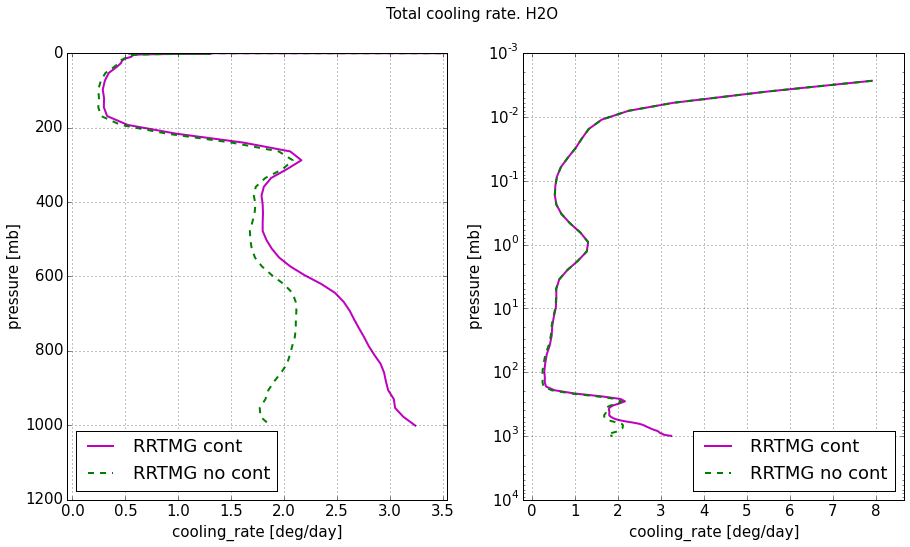

In [8]:
scripts_intermodel.lw_results_all_wavenumbers(
    name_molecule=name_molecule,
    infos_wavenumber=[('RRTMG cont', 'm', '-', pnl_rrtmg_cont),
                      ('RRTMG no cont', 'g', '--', pnl_rrtmg)])

# In RRTMG's wavenumber bands

Flux tables and cooling rates in RRTMG spectral bands


RRTMG-LW. Spectral band 1. 10.0 ~ 350.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -35.7025     0.0000  -35.7025       0.00000
30   299.70000 -38.4254    24.5201  -13.9053       1.40265
0   1013.00000 -54.5825    54.5792   -0.0033       0.00140

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -36.3061     0.0000  -36.3061       0.00000
30   299.70000 -38.7258    22.3568  -16.3690       1.36489
0   1013.00000 -54.5825    54.5778   -0.0047       0.00201

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.6036     0.0000    0.6036       0.00000
30         0   0.3004     2.1633    2.4637       0.03776
0          0   0.0000     0.0014    0.0014      -0.00061



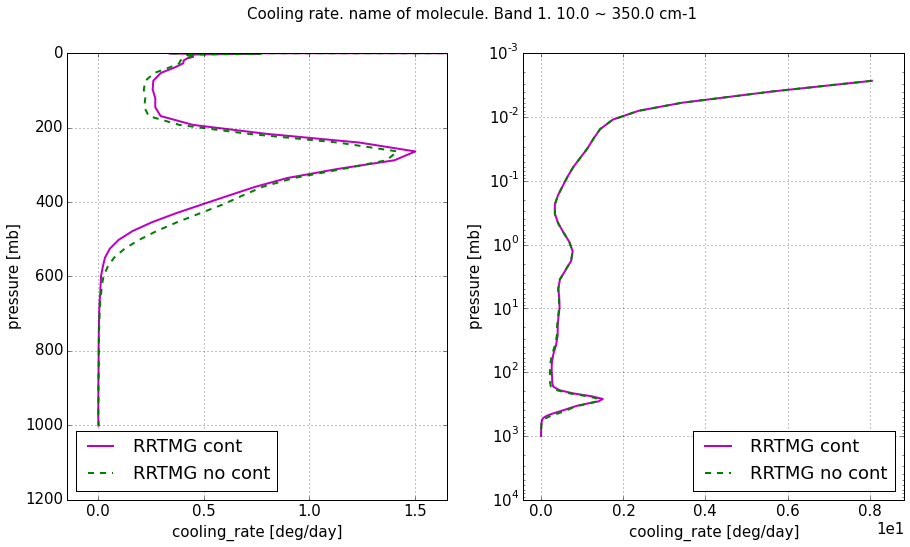


------------------------------------------------------------------------

RRTMG-LW. Spectral band 2. 350.0 ~ 500.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -43.1126     0.0000  -43.1126       0.00000
30   299.70000 -44.0132     5.5195  -38.4937       0.50015
0   1013.00000 -60.9174    60.8457   -0.0717       0.02865

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -44.3208     0.0000  -44.3208       0.00000
30   299.70000 -45.1535     5.2688  -39.8847       0.46769
0   1013.00000 -60.9174    60.7515   -0.1659       0.05173

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   1.2082     0.0000    1.2082       0.00000
30         0   1.1403     0.2507    1.3910       0.03246
0          0   0.0000     0.0942    0.0942      -0.02308



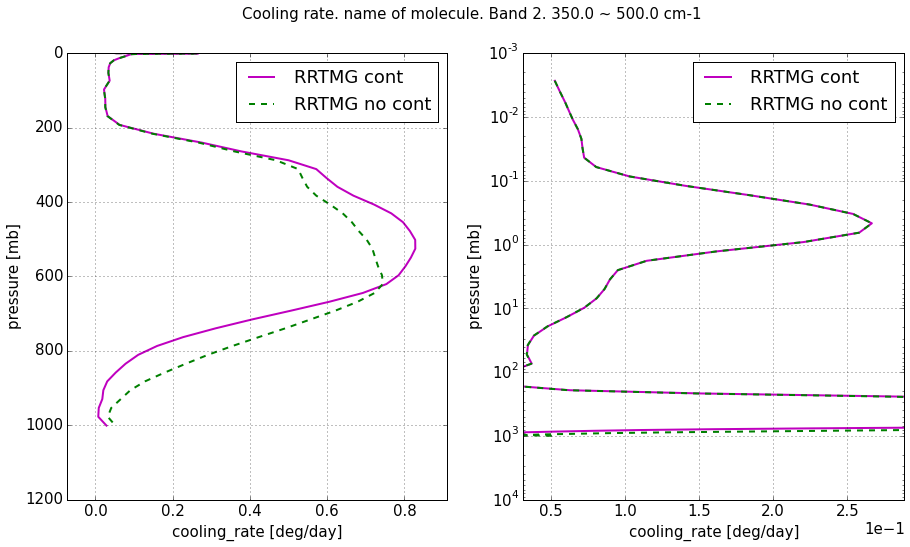


------------------------------------------------------------------------

RRTMG-LW. Spectral band 3. 500.0 ~ 630.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -45.0435     0.0000  -45.0435       0.00000
30   299.70000 -45.3933     1.2426  -44.1507       0.12307
0   1013.00000 -58.6463    58.1939   -0.4524       0.12731

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -47.0755     0.0000  -47.0755       0.00000
30   299.70000 -47.3985     1.1975  -46.2010       0.11909
0   1013.00000 -58.6463    54.0152   -4.6311       0.40161

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   2.0320     0.0000    2.0320       0.00000
30         0   2.0052     0.0451    2.0503       0.00398
0          0   0.0000     4.1787    4.1787      -0.27430



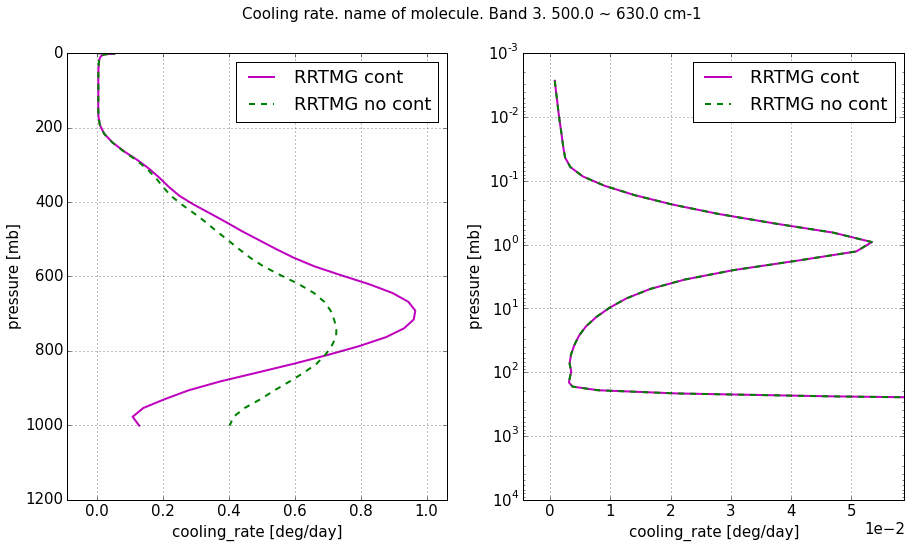


------------------------------------------------------------------------

RRTMG-LW. Spectral band 4. 630.0 ~ 700.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -25.8597     0.0000  -25.8597       0.00000
30   299.70000 -25.9260     0.1660  -25.7600       0.01814
0   1013.00000 -30.8951    28.9208   -1.9743       0.29469

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -27.1021     0.0000  -27.1021       0.00000
30   299.70000 -27.1641     0.1609  -27.0032       0.01793
0   1013.00000 -30.8951    20.5885  -10.3066       0.31701

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   1.2424     0.0000    1.2424       0.00000
30         0   1.2381     0.0051    1.2432       0.00021
0          0   0.0000     8.3323    8.3323      -0.02232



/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


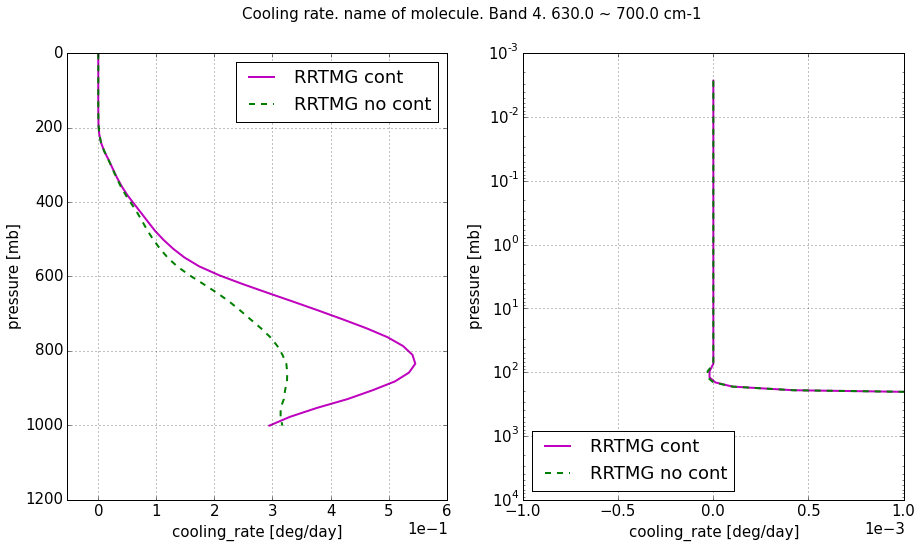


------------------------------------------------------------------------

RRTMG-LW. Spectral band 5. 700.0 ~ 820.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -44.2957     0.0000  -44.2957       0.00000
30   299.70000 -44.3277     0.0502  -44.2775       0.00448
0   1013.00000 -48.8867    34.3525  -14.5342       0.87654

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -46.0020     0.0000  -46.0020       0.00000
30   299.70000 -46.0326     0.0487  -45.9839       0.00448
0   1013.00000 -48.8867    17.0901  -31.7966       0.38616

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   1.7063     0.0000    1.7063       0.00000
30         0   1.7049     0.0015    1.7064       0.00000
0          0   0.0000    17.2624   17.2624       0.49038



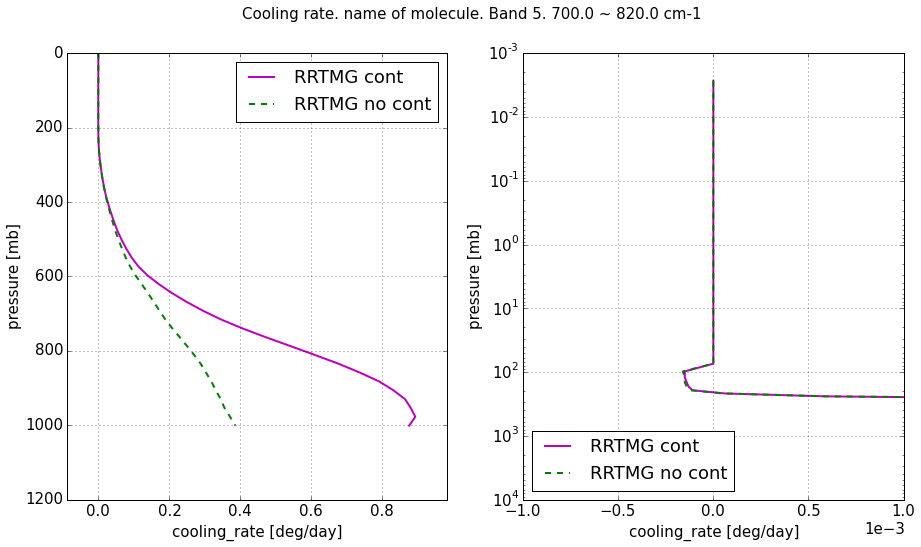


------------------------------------------------------------------------

RRTMG-LW. Spectral band 6. 820.0 ~ 980.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -51.4027     0.0000  -51.4027       0.00000
30   299.70000 -51.4093     0.0042  -51.4051      -0.00031
0   1013.00000 -53.9607    23.6088  -30.3519       0.94036

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.0264     0.0000  -53.0264       0.00000
30   299.70000 -53.0324     0.0038  -53.0286      -0.00025
0   1013.00000 -53.9607     6.1714  -47.7893       0.18999

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   1.6237     0.0000    1.6237       0.00000
30         0   1.6231     0.0004    1.6235      -0.00006
0          0   0.0000    17.4374   17.4374       0.75037



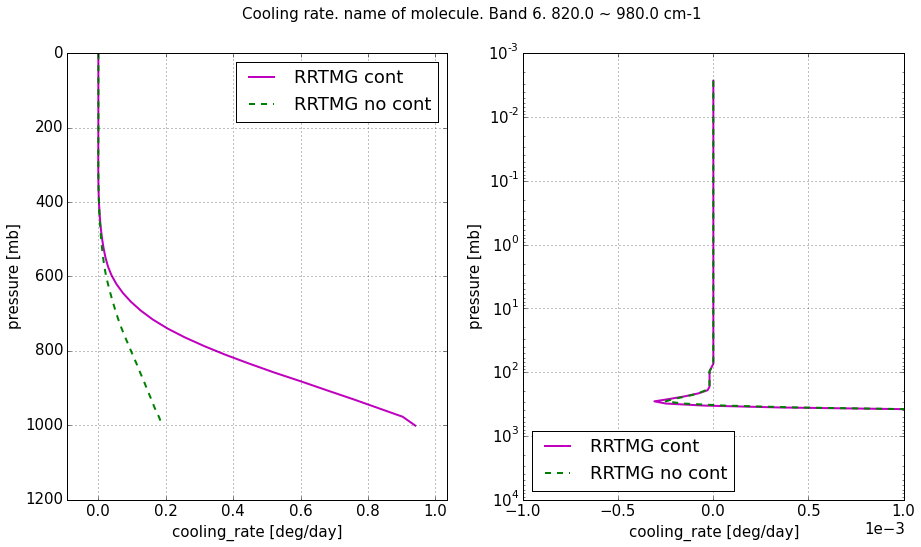


------------------------------------------------------------------------

RRTMG-LW. Spectral band 7. 980.0 ~ 1080.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -25.7386     0.0000  -25.7386       0.00000
30   299.70000 -25.7410     0.0011  -25.7399      -0.00020
0   1013.00000 -26.6402     7.6488  -18.9914       0.34081

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.2661     0.0000  -26.2661       0.00000
30   299.70000 -26.2683     0.0010  -26.2673      -0.00018
0   1013.00000 -26.6402     2.2795  -24.3607       0.07521

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.5275     0.0000    0.5275       0.00000
30         0   0.5273     0.0001    0.5274      -0.00002
0          0   0.0000     5.3693    5.3693       0.26560



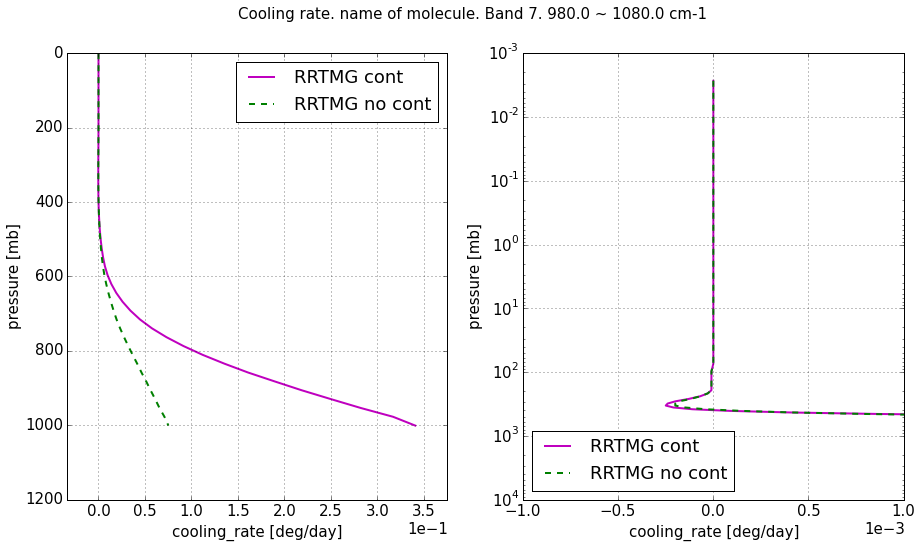


------------------------------------------------------------------------

RRTMG-LW. Spectral band 8. 1080.0 ~ 1180.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.2095     0.0000  -20.2095       0.00000
30   299.70000 -20.2190     0.0066  -20.2124      -0.00014
0   1013.00000 -21.5225     7.3836  -14.1389       0.25967

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -20.5192     0.0000  -20.5192       0.00000
30   299.70000 -20.5287     0.0066  -20.5221      -0.00014
0   1013.00000 -21.5225     4.5509  -16.9716       0.12243

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.3097     0.0000    0.3097       0.00000
30         0   0.3097     0.0000    0.3097       0.00000
0          0   0.0000     2.8327    2.8327       0.13724



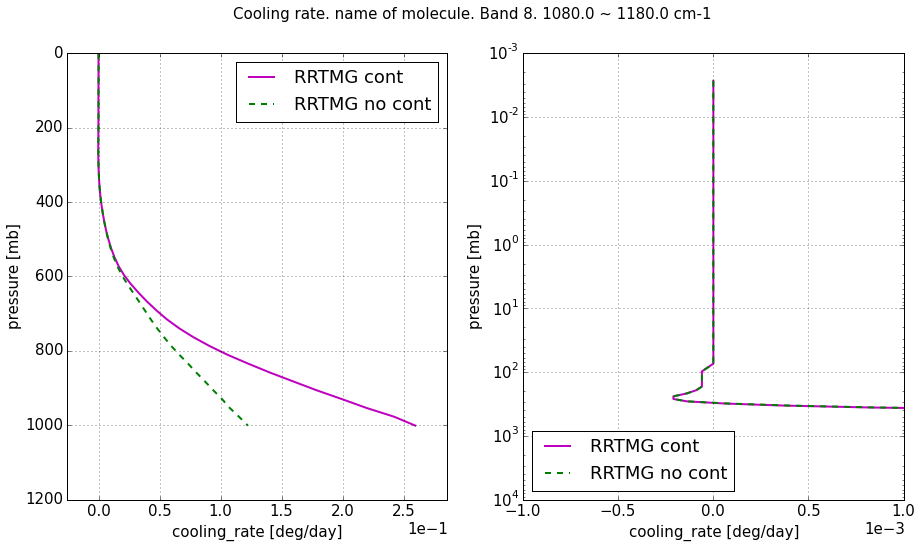


------------------------------------------------------------------------

RRTMG-LW. Spectral band 9. 1180.0 ~ 1390.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -21.5177     0.0000  -21.5177       0.00000
30   299.70000 -21.7630     0.3147  -21.4483       0.01606
0   1013.00000 -31.2998    24.0055   -7.2943       0.29408

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -22.0664     0.0000  -22.0664       0.00000
30   299.70000 -22.3024     0.3088  -21.9936       0.01648
0   1013.00000 -31.2998    22.2084   -9.0914       0.25038

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.5487     0.0000    0.5487       0.00000
30         0   0.5394     0.0059    0.5453      -0.00042
0          0   0.0000     1.7971    1.7971       0.04370



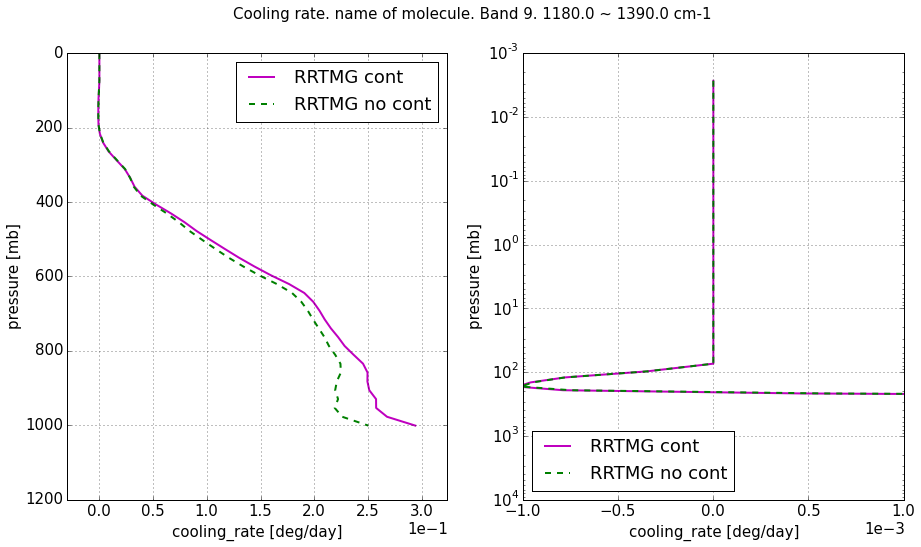


------------------------------------------------------------------------

RRTMG-LW. Spectral band 10. 1390.0 ~ 1480.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.3542     0.0000   -2.3542       0.00000
30   299.70000  -2.6054     0.4857   -2.1197       0.02841
0   1013.00000  -8.8986     8.8893   -0.0093       0.00397

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.4808     0.0000   -2.4808       0.00000
30   299.70000  -2.7200     0.4662   -2.2538       0.02661
0   1013.00000  -8.8986     8.8866   -0.0120       0.00512

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.1266     0.0000    0.1266       0.00000
30         0   0.1146     0.0195    0.1341       0.00180
0          0   0.0000     0.0027    0.0027      -0.00115



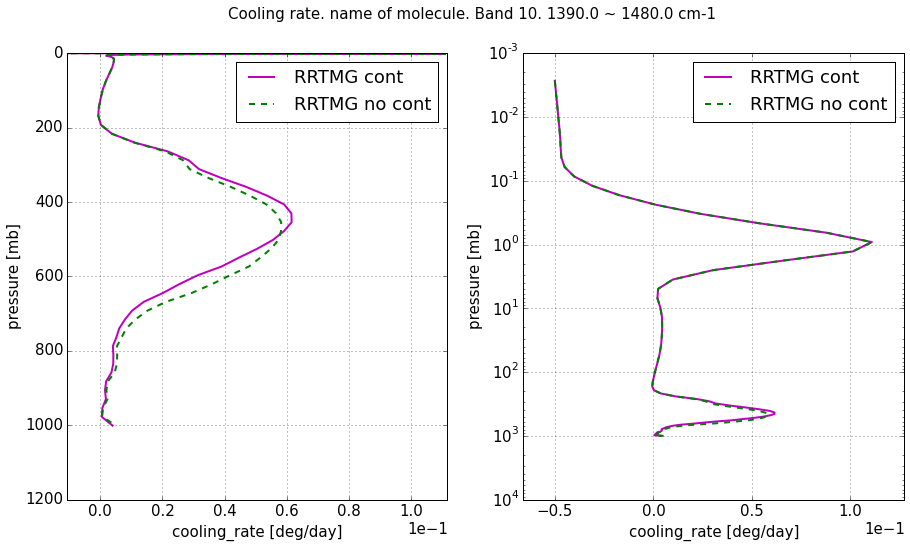


------------------------------------------------------------------------

RRTMG-LW. Spectral band 11. 1480.0 ~ 1800.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -3.0162     0.0000   -3.0162       0.00000
30   299.70000  -3.7183     1.3225   -2.3958       0.07093
0   1013.00000 -17.8828    17.8732   -0.0096       0.00410

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -3.2226     0.0000   -3.2226       0.00000
30   299.70000  -3.8991     1.2651   -2.6340       0.06488
0   1013.00000 -17.8828    17.8685   -0.0143       0.00607

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.2064     0.0000    0.2064       0.00000
30         0   0.1808     0.0574    0.2382       0.00605
0          0   0.0000     0.0047    0.0047      -0.00197



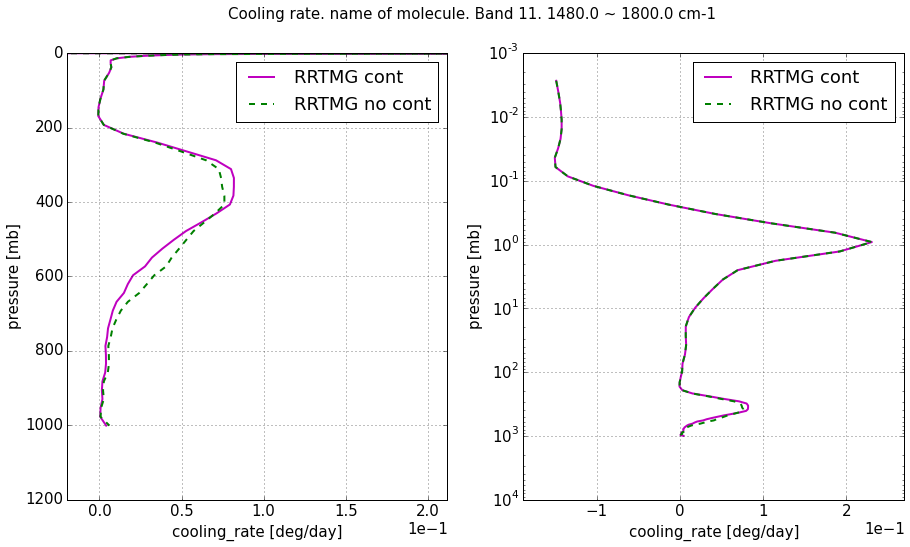


------------------------------------------------------------------------

RRTMG-LW. Spectral band 12. 1800.0 ~ 2080.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.6056     0.0000   -2.6056       0.00000
30   299.70000  -2.6628     0.0642   -2.5986       0.00061
0   1013.00000  -5.9578     5.4473   -0.5105       0.04156

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -2.7629     0.0000   -2.7629       0.00000
30   299.70000  -2.8171     0.0630   -2.7541       0.00084
0   1013.00000  -5.9578     5.2503   -0.7075       0.04283

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.1573     0.0000    0.1573       0.00000
30         0   0.1543     0.0012    0.1555      -0.00023
0          0   0.0000     0.1970    0.1970      -0.00127



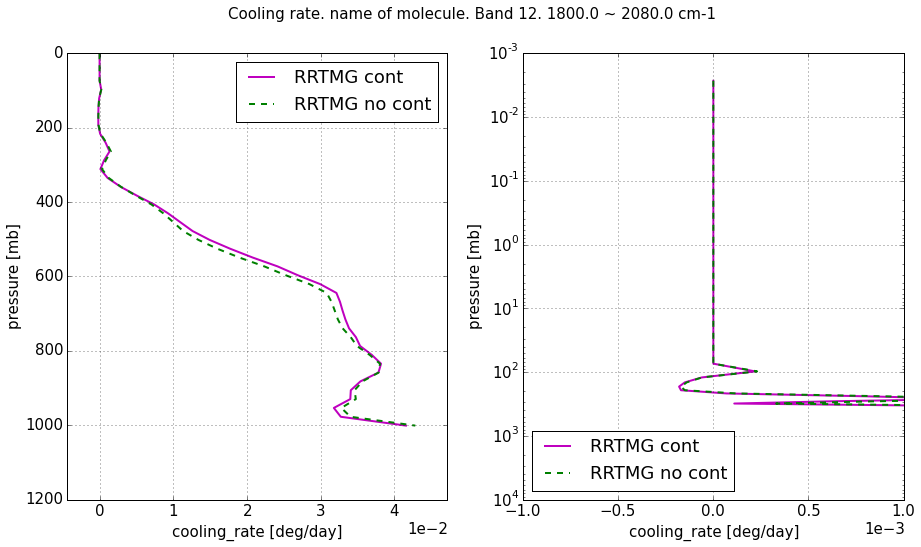


------------------------------------------------------------------------

RRTMG-LW. Spectral band 13. 2080.0 ~ 2250.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.4012     0.0000   -1.4012       0.00000
30   299.70000  -1.4028     0.0002   -1.4026      -0.00022
0   1013.00000  -1.6390     0.6063   -1.0327       0.01773

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -1.4164     0.0000   -1.4164       0.00000
30   299.70000  -1.4180     0.0002   -1.4178      -0.00021
0   1013.00000  -1.6390     0.5408   -1.0982       0.01455

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.0152     0.0000    0.0152       0.00000
30         0   0.0152     0.0000    0.0152      -0.00001
0          0   0.0000     0.0655    0.0655       0.00318



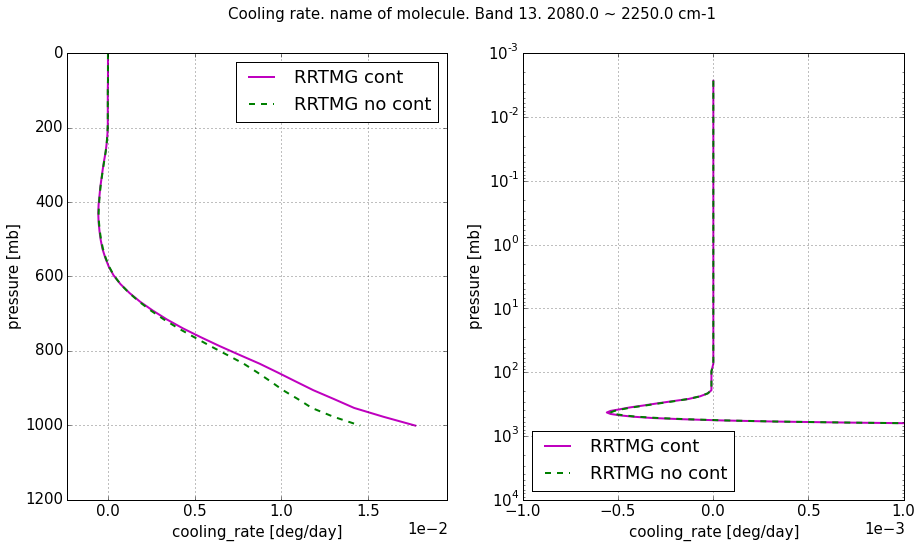


------------------------------------------------------------------------

RRTMG-LW. Spectral band 14. 2250.0 ~ 2380.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7288      0.000   -0.7288       0.00000
30   299.70000  -0.7288      0.000   -0.7288       0.00000
0   1013.00000  -0.7316      0.013   -0.7186       0.00078

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.7315          0   -0.7315             0
30   299.70000  -0.7315          0   -0.7315             0
0   1013.00000  -0.7316          0   -0.7316             0

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.0027      0.000    0.0027       0.00000
30         0   0.0027      0.000    0.0027       0.00000
0          0   0.0000      0.013    0.0130       0.00078



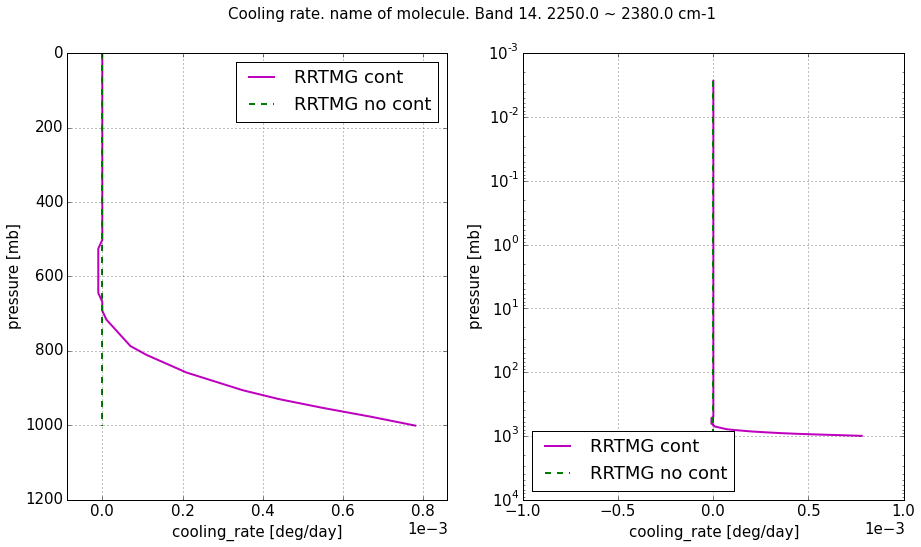


------------------------------------------------------------------------

RRTMG-LW. Spectral band 15. 2380.0 ~ 2600.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5477     0.0000   -0.5477       0.00000
30   299.70000  -0.5693     0.0007   -0.5686      -0.00110
0   1013.00000  -0.6658     0.1187   -0.5471       0.00337

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.5487     0.0000   -0.5487       0.00000
30   299.70000  -0.5702     0.0007   -0.5695      -0.00110
0   1013.00000  -0.6658     0.1142   -0.5516       0.00312

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.0010     0.0000    0.0010       0.00000
30         0   0.0009     0.0000    0.0009       0.00000
0          0   0.0000     0.0045    0.0045       0.00025



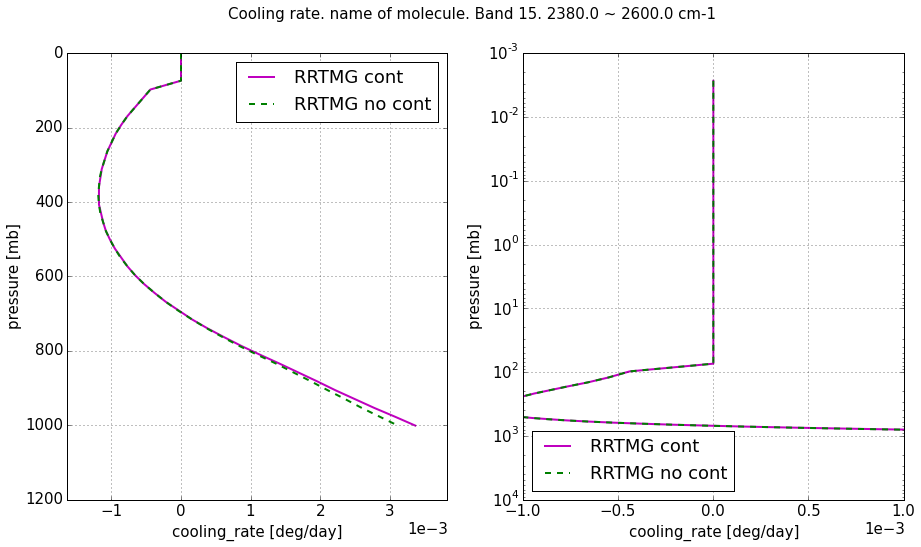


------------------------------------------------------------------------

RRTMG-LW. Spectral band 16. 2600.0 ~ 3250.0 cm-1

RRTMG cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3603     0.0000   -0.3603       0.00000
30   299.70000  -0.3615     0.0002   -0.3613      -0.00014
0   1013.00000  -0.4713     0.1676   -0.3037       0.00367

RRTMG no cont
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -0.3668     0.0000   -0.3668       0.00000
30   299.70000  -0.3679     0.0002   -0.3677      -0.00013
0   1013.00000  -0.4713     0.1516   -0.3197       0.00297

RRTMG cont - RRTMG no cont
    pressure  flux_up  flux_down  net_flux  cooling_rate
70         0   0.0065      0.000    0.0065       0.00000
30         0   0.0064      0.000    0.0064      -0.00001
0          0   0.0000      0.016    0.0160       0.00070



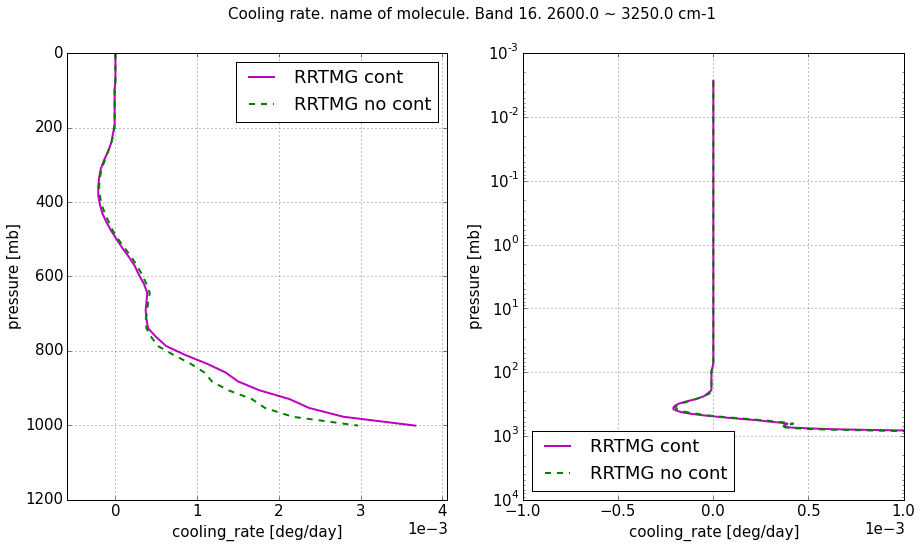


------------------------------------------------------------------------



In [9]:
print('Flux tables and cooling rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.lw_results_by_rrtmg_bands(
    infos_lbl=[('RRTMG cont', 'm', '-', pnl_rrtmg_cont),
               ('RRTMG no cont', 'g', '--', pnl_rrtmg)])

In [10]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')